In [1]:
#  EXPERIMENTING WITH DEEP NEURAL NETWORKS

In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Perform the required pre-processing (attribute removal, encoding, feature scaling) and write comment lines to explain the pre-processing steps.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OneHotEncoder

In [ ]:
# we are removing the unneccesaery attributes

In [8]:
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# we are coverting the categorical into numerical by label encoding

In [28]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
#we are coverting the categorical into numerical by label encoding

In [26]:
X = data.drop('Exited', axis=1)
y = data['Exited']
#declaring dependent and independent variables, data and target basically.

In [30]:
print("Unique values after Label Encoding:")
print("Geography:", data['Geography'].unique())
print("Gender:", data['Gender'].unique())

Unique values after Label Encoding:
Geography: [0 2 1]
Gender: [0 1]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#splitting data into test and train

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Split the data into training, validation, and testing sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# feature scaling

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [35]:
import tensorflow as tf

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# For the first network with 1 hidden layer,(128, 0 ,0),Epochs-10,20,30 and Learning rate -0.1,0.01,0.001

In [82]:
learning_rates = [0.1, 0.01, 0.001]
epochs_list = [10, 20, 30]

for epochs in epochs_list:
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}, Epochs: {epochs}")
        
        # Build a neural network model
        model = keras.Sequential([
            layers.Input(shape=(X_train_scaled.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])
        
        optimizer = keras.optimizers.legacy.Adam(learning_rate=lr)  # Use legacy optimizer
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val))
        
        test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Training with learning rate: 0.1, Epochs: 10
Epoch 1/10
219/219 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7990 - val_loss: 0.4176 - val_accuracy: 0.8393
Epoch 2/10
219/219 [==============================] - 0s 689us/step - loss: 0.4611 - accuracy: 0.8190 - val_loss: 0.4495 - val_accuracy: 0.8327
Epoch 3/10
219/219 [==============================] - 0s 704us/step - loss: 0.4406 - accuracy: 0.8257 - val_loss: 0.3713 - val_accuracy: 0.8480
Epoch 4/10
219/219 [==============================] - 0s 697us/step - loss: 0.4380 - accuracy: 0.8294 - val_loss: 0.3924 - val_accuracy: 0.8413
Epoch 5/10
219/219 [==============================] - 0s 705us/step - loss: 0.4225 - accuracy: 0.8333 - val_loss: 0.3690 - val_accuracy: 0.8653
Epoch 6/10
219/219 [==============================] - 0s 698us/step - loss: 0.4237 - accuracy: 0.8354 - val_loss: 0.3714 - val_accuracy: 0.8600
Epoch 7/10
219/219 [==============================] - 0s 695us/step - loss: 0.4208 - accuracy

In [51]:
results = {}

In [65]:
# if epochs not in results:
#         results[epochs] = {}
#         results[epochs][lr] = (test_loss, test_accuracy)

In [83]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print()

47/47 [==============================] - 0s 500us/step - loss: 0.3441 - accuracy: 0.8593
Test Loss: 0.3441374897956848, Test Accuracy: 0.859333336353302



In [ ]:
# Second Nueral network with 2 hidden layers (128,64,0), epochs =(10,20,30) and learning rate=(0.1,0.01,0.001)

In [84]:
learning_rates = [0.1, 0.01, 0.001]
epochs_list = [10, 20, 30]

for epochs in epochs_list:
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}, Epochs: {epochs}")
        
        # Build a neural network model
        model = keras.Sequential([
            layers.Input(shape=(X_train_scaled.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64,activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])
        
        optimizer = keras.optimizers.legacy.Adam(learning_rate=lr)  # Use legacy optimizer
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val))
        
        test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Training with learning rate: 0.1, Epochs: 10
Epoch 1/10
219/219 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7870 - val_loss: 0.5622 - val_accuracy: 0.8107
Epoch 2/10
219/219 [==============================] - 0s 808us/step - loss: 0.5140 - accuracy: 0.7907 - val_loss: 0.4854 - val_accuracy: 0.8107
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5118 - accuracy: 0.7924 - val_loss: 0.4936 - val_accuracy: 0.8107
Epoch 4/10
219/219 [==============================] - 0s 776us/step - loss: 0.5128 - accuracy: 0.7924 - val_loss: 0.4859 - val_accuracy: 0.8107
Epoch 5/10
219/219 [==============================] - 0s 765us/step - loss: 0.5133 - accuracy: 0.7924 - val_loss: 0.4861 - val_accuracy: 0.8107
Epoch 6/10
219/219 [==============================] - 0s 782us/step - loss: 0.5121 - accuracy: 0.7924 - val_loss: 0.4868 - val_accuracy: 0.8107
Epoch 7/10
219/219 [==============================] - 0s 787us/step - loss: 0.5128 - accuracy: 

In [70]:
results = {}

In [71]:
if epochs not in results:
        results[epochs] = {}
        results[epochs][lr] = (test_loss, test_accuracy)

In [85]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print()

47/47 [==============================] - 0s 497us/step - loss: 0.3527 - accuracy: 0.8580
Test Loss: 0.3527255356311798, Test Accuracy: 0.8579999804496765



In [ ]:
# For nueral netwrok with 3 hidden layers (128,64,32), epochs=(10,20,30) and  learning rate=(0.1,0.01,0.001)

In [86]:
learning_rates = [0.1, 0.01, 0.001]
epochs_list = [10, 20, 30]

for epochs in epochs_list:
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}, Epochs: {epochs}")
        
        # Build a neural network model
        model = keras.Sequential([
            layers.Input(shape=(X_train_scaled.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64,activation='relu'),
            layers.Dense(32,activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])
        
        optimizer = keras.optimizers.legacy.Adam(learning_rate=lr)  # Use legacy optimizer
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val))
        
        test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Training with learning rate: 0.1, Epochs: 10
Epoch 1/10
219/219 [==============================] - 0s 1ms/step - loss: 0.5386 - accuracy: 0.7876 - val_loss: 0.4854 - val_accuracy: 0.8107
Epoch 2/10
219/219 [==============================] - 0s 869us/step - loss: 0.5128 - accuracy: 0.7924 - val_loss: 0.4949 - val_accuracy: 0.8107
Epoch 3/10
219/219 [==============================] - 0s 857us/step - loss: 0.5121 - accuracy: 0.7924 - val_loss: 0.4853 - val_accuracy: 0.8107
Epoch 4/10
219/219 [==============================] - 0s 855us/step - loss: 0.5132 - accuracy: 0.7924 - val_loss: 0.4857 - val_accuracy: 0.8107
Epoch 5/10
219/219 [==============================] - 0s 858us/step - loss: 0.5125 - accuracy: 0.7924 - val_loss: 0.4853 - val_accuracy: 0.8107
Epoch 6/10
219/219 [==============================] - 0s 833us/step - loss: 0.5120 - accuracy: 0.7924 - val_loss: 0.4866 - val_accuracy: 0.8107
Epoch 7/10
219/219 [==============================] - 0s 854us/step - loss: 0.5132 - accuracy

In [87]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print()

47/47 [==============================] - 0s 509us/step - loss: 0.3918 - accuracy: 0.8427
Test Loss: 0.391751229763031, Test Accuracy: 0.8426666855812073



In [ ]:
# We are done with 3 nueral networks 

In [ ]:
# Visualize the training and validation loss against the epochs using appropriate plots

In [88]:
learning_rates = [0.1, 0.01, 0.001]

In [89]:
epochs_list = [10, 20, 30]

In [90]:
import matplotlib.pyplot as plt

In [93]:
from tensorflow.keras.optimizers import legacy

Training with learning rate: 0.1, epochs: 10
Epoch 1/10
219/219 [==============================] - 0s 1000us/step - loss: 0.5194 - accuracy: 0.7959 - val_loss: 0.4009 - val_accuracy: 0.8313
Epoch 2/10
219/219 [==============================] - 0s 694us/step - loss: 0.4384 - accuracy: 0.8250 - val_loss: 0.3924 - val_accuracy: 0.8387
Epoch 3/10
219/219 [==============================] - 0s 708us/step - loss: 0.4375 - accuracy: 0.8243 - val_loss: 0.3813 - val_accuracy: 0.8487
Epoch 4/10
219/219 [==============================] - 0s 697us/step - loss: 0.4304 - accuracy: 0.8276 - val_loss: 0.3868 - val_accuracy: 0.8620
Epoch 5/10
219/219 [==============================] - 0s 703us/step - loss: 0.4223 - accuracy: 0.8331 - val_loss: 0.4813 - val_accuracy: 0.7887
Epoch 6/10
219/219 [==============================] - 0s 694us/step - loss: 0.4378 - accuracy: 0.8296 - val_loss: 0.3542 - val_accuracy: 0.8633
Epoch 7/10
219/219 [==============================] - 0s 695us/step - loss: 0.4157 - accur

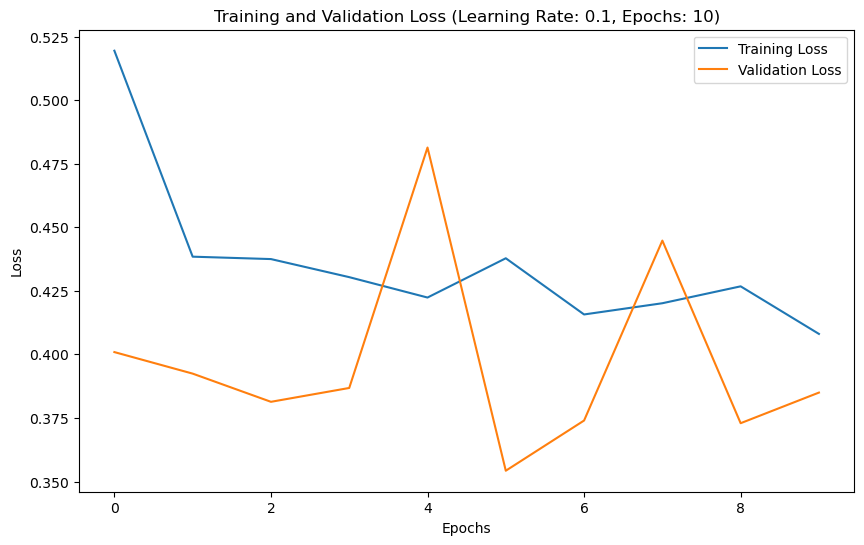

Training with learning rate: 0.1, epochs: 20
Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.7950 - val_loss: 0.4361 - val_accuracy: 0.8300
Epoch 2/20
219/219 [==============================] - 0s 712us/step - loss: 0.4545 - accuracy: 0.8230 - val_loss: 0.4099 - val_accuracy: 0.8547
Epoch 3/20
219/219 [==============================] - 0s 691us/step - loss: 0.4338 - accuracy: 0.8309 - val_loss: 0.4780 - val_accuracy: 0.8233
Epoch 4/20
219/219 [==============================] - 0s 691us/step - loss: 0.4362 - accuracy: 0.8280 - val_loss: 0.4538 - val_accuracy: 0.8460
Epoch 5/20
219/219 [==============================] - 0s 705us/step - loss: 0.4262 - accuracy: 0.8330 - val_loss: 0.3920 - val_accuracy: 0.8540
Epoch 6/20
219/219 [==============================] - 0s 703us/step - loss: 0.4213 - accuracy: 0.8324 - val_loss: 0.4291 - val_accuracy: 0.8193
Epoch 7/20
219/219 [==============================] - 0s 698us/step - loss: 0.4212 - accuracy

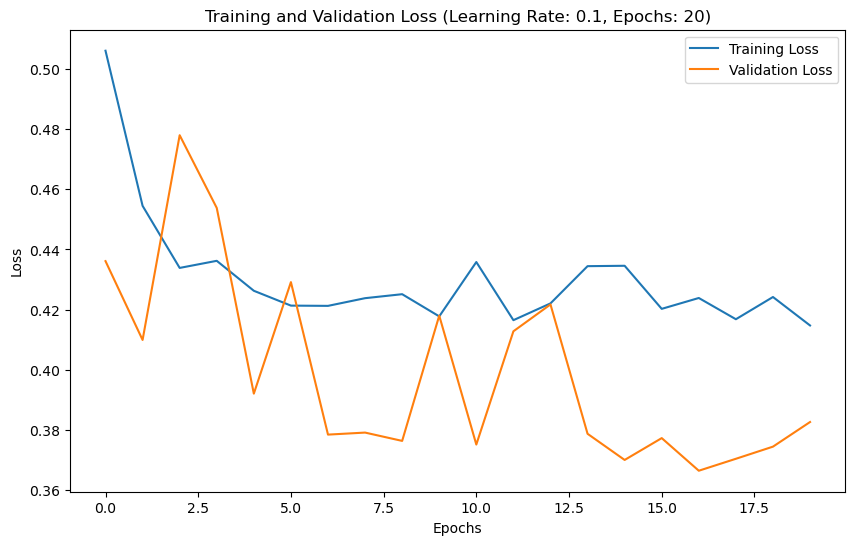

Training with learning rate: 0.1, epochs: 30
Epoch 1/30
219/219 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.7979 - val_loss: 0.4162 - val_accuracy: 0.8520
Epoch 2/30
219/219 [==============================] - 0s 688us/step - loss: 0.4497 - accuracy: 0.8233 - val_loss: 0.3768 - val_accuracy: 0.8480
Epoch 3/30
219/219 [==============================] - 0s 677us/step - loss: 0.4308 - accuracy: 0.8279 - val_loss: 0.4008 - val_accuracy: 0.8420
Epoch 4/30
219/219 [==============================] - 0s 678us/step - loss: 0.4212 - accuracy: 0.8367 - val_loss: 0.4015 - val_accuracy: 0.8507
Epoch 5/30
219/219 [==============================] - 0s 685us/step - loss: 0.4282 - accuracy: 0.8361 - val_loss: 0.4237 - val_accuracy: 0.8313
Epoch 6/30
219/219 [==============================] - 0s 681us/step - loss: 0.4387 - accuracy: 0.8324 - val_loss: 0.4111 - val_accuracy: 0.8513
Epoch 7/30
219/219 [==============================] - 0s 689us/step - loss: 0.4299 - accuracy

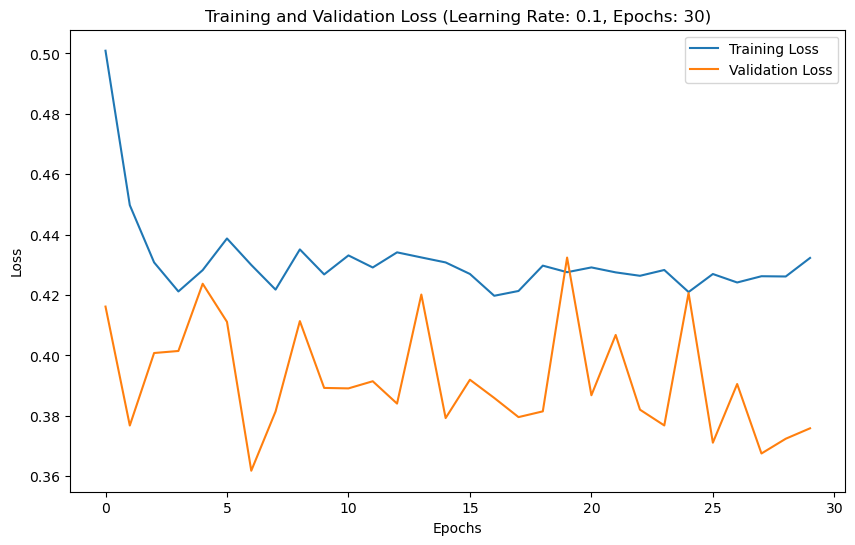

Training with learning rate: 0.01, epochs: 10
Epoch 1/10
219/219 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8263 - val_loss: 0.3662 - val_accuracy: 0.8533
Epoch 2/10
219/219 [==============================] - 0s 702us/step - loss: 0.3768 - accuracy: 0.8434 - val_loss: 0.3553 - val_accuracy: 0.8653
Epoch 3/10
219/219 [==============================] - 0s 688us/step - loss: 0.3693 - accuracy: 0.8461 - val_loss: 0.3436 - val_accuracy: 0.8580
Epoch 4/10
219/219 [==============================] - 0s 681us/step - loss: 0.3665 - accuracy: 0.8460 - val_loss: 0.3405 - val_accuracy: 0.8633
Epoch 5/10
219/219 [==============================] - 0s 689us/step - loss: 0.3656 - accuracy: 0.8490 - val_loss: 0.3394 - val_accuracy: 0.8673
Epoch 6/10
219/219 [==============================] - 0s 702us/step - loss: 0.3619 - accuracy: 0.8490 - val_loss: 0.3358 - val_accuracy: 0.8653
Epoch 7/10
219/219 [==============================] - 0s 689us/step - loss: 0.3621 - accurac

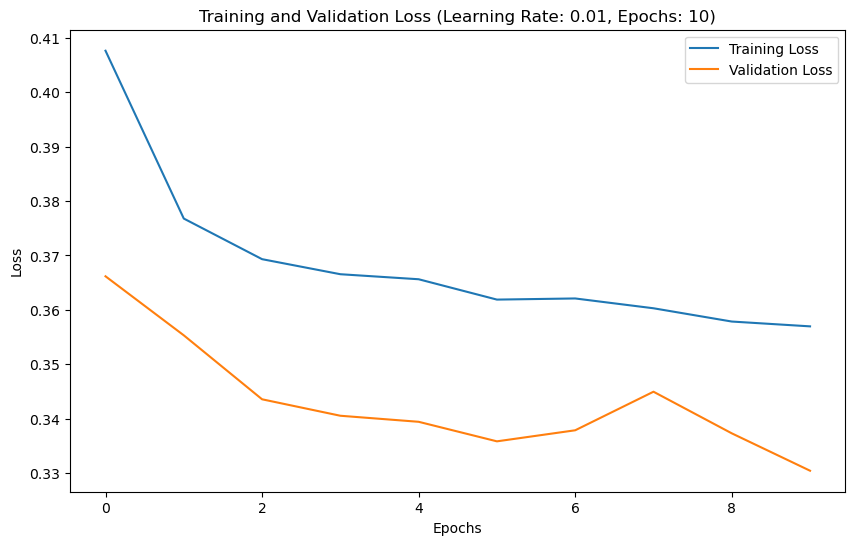

Training with learning rate: 0.01, epochs: 20
Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8246 - val_loss: 0.3542 - val_accuracy: 0.8620
Epoch 2/20
219/219 [==============================] - 0s 676us/step - loss: 0.3778 - accuracy: 0.8421 - val_loss: 0.3492 - val_accuracy: 0.8627
Epoch 3/20
219/219 [==============================] - 0s 662us/step - loss: 0.3676 - accuracy: 0.8481 - val_loss: 0.3655 - val_accuracy: 0.8600
Epoch 4/20
219/219 [==============================] - 0s 666us/step - loss: 0.3697 - accuracy: 0.8450 - val_loss: 0.3415 - val_accuracy: 0.8620
Epoch 5/20
219/219 [==============================] - 0s 664us/step - loss: 0.3673 - accuracy: 0.8499 - val_loss: 0.3446 - val_accuracy: 0.8653
Epoch 6/20
219/219 [==============================] - 0s 665us/step - loss: 0.3648 - accuracy: 0.8504 - val_loss: 0.3438 - val_accuracy: 0.8687
Epoch 7/20
219/219 [==============================] - 0s 666us/step - loss: 0.3575 - accurac

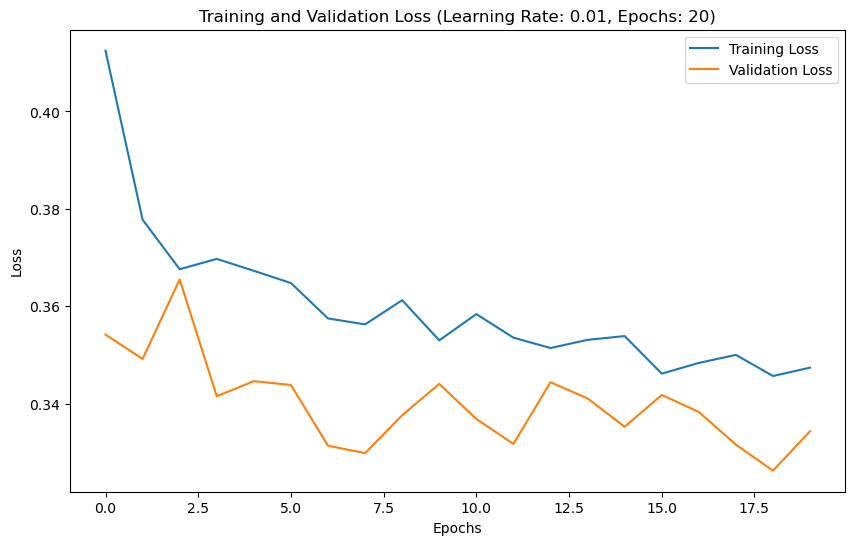

Training with learning rate: 0.01, epochs: 30
Epoch 1/30
219/219 [==============================] - 0s 988us/step - loss: 0.4101 - accuracy: 0.8310 - val_loss: 0.3542 - val_accuracy: 0.8560
Epoch 2/30
219/219 [==============================] - 0s 673us/step - loss: 0.3774 - accuracy: 0.8441 - val_loss: 0.3578 - val_accuracy: 0.8533
Epoch 3/30
219/219 [==============================] - 0s 668us/step - loss: 0.3700 - accuracy: 0.8450 - val_loss: 0.3447 - val_accuracy: 0.8640
Epoch 4/30
219/219 [==============================] - 0s 665us/step - loss: 0.3687 - accuracy: 0.8499 - val_loss: 0.3481 - val_accuracy: 0.8607
Epoch 5/30
219/219 [==============================] - 0s 665us/step - loss: 0.3667 - accuracy: 0.8449 - val_loss: 0.3525 - val_accuracy: 0.8627
Epoch 6/30
219/219 [==============================] - 0s 664us/step - loss: 0.3568 - accuracy: 0.8530 - val_loss: 0.3332 - val_accuracy: 0.8707
Epoch 7/30
219/219 [==============================] - 0s 667us/step - loss: 0.3580 - accur

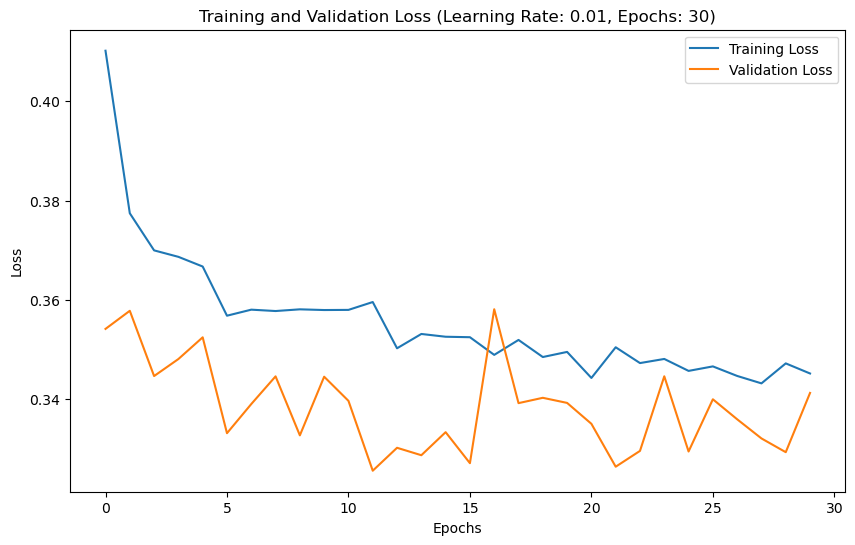

Training with learning rate: 0.001, epochs: 10
Epoch 1/10
219/219 [==============================] - 0s 989us/step - loss: 0.4749 - accuracy: 0.7951 - val_loss: 0.4142 - val_accuracy: 0.8273
Epoch 2/10
219/219 [==============================] - 0s 671us/step - loss: 0.4162 - accuracy: 0.8217 - val_loss: 0.3880 - val_accuracy: 0.8460
Epoch 3/10
219/219 [==============================] - 0s 670us/step - loss: 0.3958 - accuracy: 0.8377 - val_loss: 0.3642 - val_accuracy: 0.8600
Epoch 4/10
219/219 [==============================] - 0s 667us/step - loss: 0.3799 - accuracy: 0.8431 - val_loss: 0.3547 - val_accuracy: 0.8613
Epoch 5/10
219/219 [==============================] - 0s 666us/step - loss: 0.3722 - accuracy: 0.8454 - val_loss: 0.3467 - val_accuracy: 0.8653
Epoch 6/10
219/219 [==============================] - 0s 666us/step - loss: 0.3640 - accuracy: 0.8503 - val_loss: 0.3452 - val_accuracy: 0.8647
Epoch 7/10
219/219 [==============================] - 0s 666us/step - loss: 0.3623 - accu

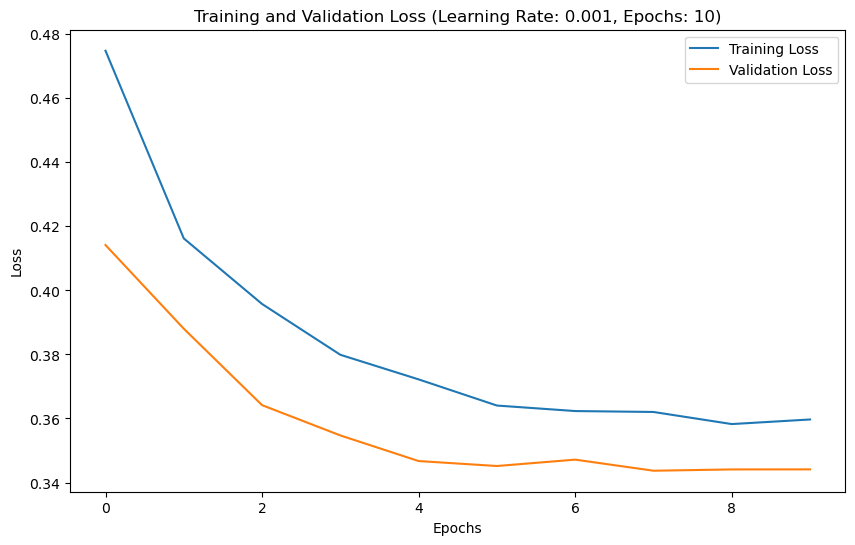

Training with learning rate: 0.001, epochs: 20
Epoch 1/20
219/219 [==============================] - 0s 976us/step - loss: 0.4699 - accuracy: 0.7894 - val_loss: 0.4068 - val_accuracy: 0.8287
Epoch 2/20
219/219 [==============================] - 0s 673us/step - loss: 0.4140 - accuracy: 0.8266 - val_loss: 0.3870 - val_accuracy: 0.8447
Epoch 3/20
219/219 [==============================] - 0s 666us/step - loss: 0.3927 - accuracy: 0.8383 - val_loss: 0.3678 - val_accuracy: 0.8620
Epoch 4/20
219/219 [==============================] - 0s 666us/step - loss: 0.3782 - accuracy: 0.8409 - val_loss: 0.3581 - val_accuracy: 0.8607
Epoch 5/20
219/219 [==============================] - 0s 668us/step - loss: 0.3708 - accuracy: 0.8507 - val_loss: 0.3514 - val_accuracy: 0.8640
Epoch 6/20
219/219 [==============================] - 0s 666us/step - loss: 0.3645 - accuracy: 0.8459 - val_loss: 0.3477 - val_accuracy: 0.8653
Epoch 7/20
219/219 [==============================] - 0s 667us/step - loss: 0.3619 - accu

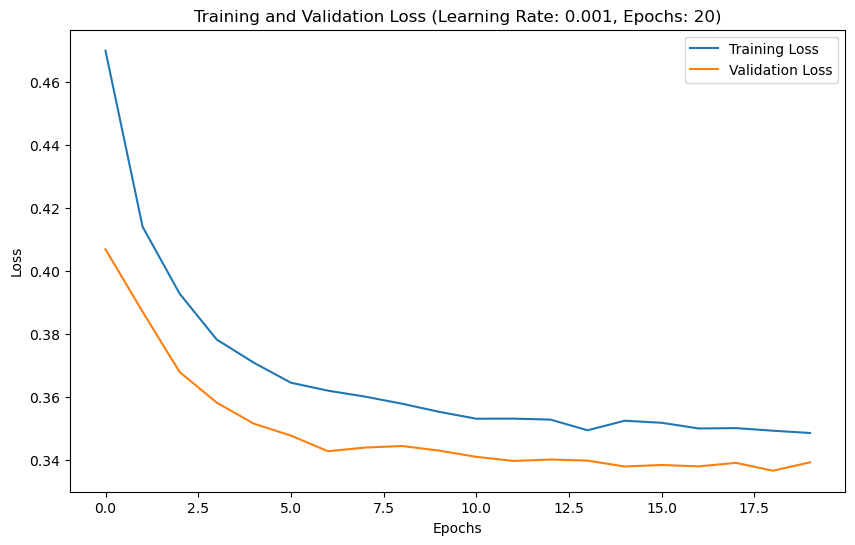

Training with learning rate: 0.001, epochs: 30
Epoch 1/30
219/219 [==============================] - 0s 990us/step - loss: 0.4771 - accuracy: 0.7914 - val_loss: 0.4118 - val_accuracy: 0.8293
Epoch 2/30
219/219 [==============================] - 0s 675us/step - loss: 0.4171 - accuracy: 0.8250 - val_loss: 0.3865 - val_accuracy: 0.8493
Epoch 3/30
219/219 [==============================] - 0s 668us/step - loss: 0.3961 - accuracy: 0.8386 - val_loss: 0.3687 - val_accuracy: 0.8567
Epoch 4/30
219/219 [==============================] - 0s 669us/step - loss: 0.3778 - accuracy: 0.8424 - val_loss: 0.3573 - val_accuracy: 0.8647
Epoch 5/30
219/219 [==============================] - 0s 668us/step - loss: 0.3713 - accuracy: 0.8464 - val_loss: 0.3503 - val_accuracy: 0.8640
Epoch 6/30
219/219 [==============================] - 0s 669us/step - loss: 0.3657 - accuracy: 0.8490 - val_loss: 0.3482 - val_accuracy: 0.8653
Epoch 7/30
219/219 [==============================] - 0s 669us/step - loss: 0.3626 - accu

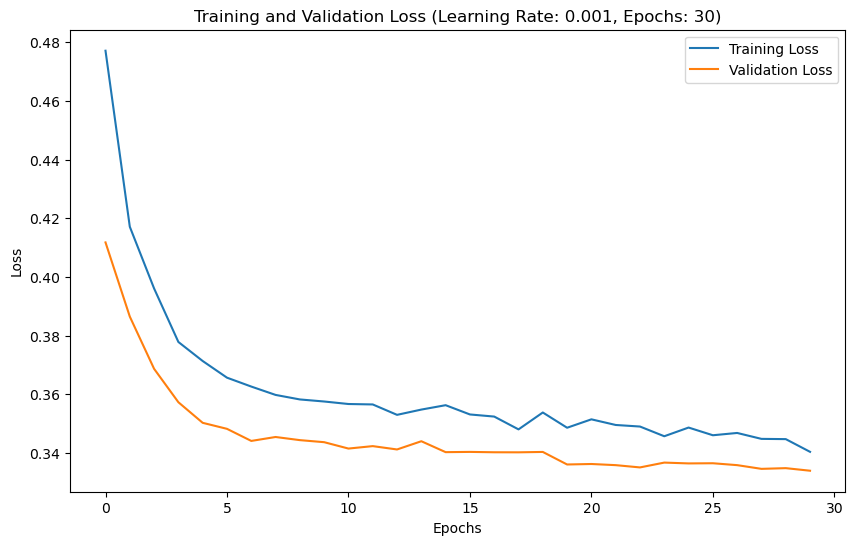

In [94]:
for lr in learning_rates:
    for epochs in epochs_list:
        print(f"Training with learning rate: {lr}, epochs: {epochs}")
        model = keras.Sequential([
            layers.Input(shape=(X_train_scaled.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])
        
        # Use the legacy Adam optimizer
        optimizer = legacy.Adam(learning_rate=lr)
        
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        # Train the model for specified epochs and store the history
        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val))
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Training and Validation Loss (Learning Rate: {lr}, Epochs: {epochs})')
        plt.legend()
        plt.show()

# comment on the performance 

### Experiment 1: Learning Rate = 0.1, Epochs = 10-30

#### The model is gradually improving as the number of epochs increases.
#### Learning rate of 0.1 seems to be too high, as the training is not very stable. Loss and accuracy values are fluctuating.
#### The model achieves decent accuracy on both training and validation data.

### Experiment 2: Learning Rate = 0.01, Epochs = 10-30

#### Lower learning rate of 0.01 seems to provide more stable training with smoother convergence.
#### The model continues to improve over epochs and achieves a good balance between training and validation accuracy.
### Experiment 3: Learning Rate = 0.001, Epochs = 10

#### The model starts with a higher loss and lower accuracy due to the lower learning rate. It's likely that this experiment needs more epochs to fully converge and achieve better results.Overall, it seems like the experiment with a learning rate of 0.01 and around 20-30 epochs is providing the best results, as it achieves good convergence with relatively stable training.